# Recognising handwritten digits (MNIST)
_The "Hello world" of neural networks_

In [1]:
# Typical Imports: torch, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import OrderedDict
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# This is a function just to give us pretty outputs of an image and what our model's guess
# https://discuss.pytorch.org/t/view-classify-in-module-helper/30279/6

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [3]:
# First of all, import the data we will be working with

# We define a transform to normalize the data just so what we can apply it after we import the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)) ])

# Download and load the training data (Set download to False if you've run this before)
trainset    = datasets.MNIST('MNIST_data/', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Same as above but for the testing data
testset    = datasets.MNIST('MNIST_data/', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [11]:
# This is a useful way of moving/iterating through our data
dataiter = iter(trainloader)
images, labels = dataiter.next()
# Here's the shape of a batch of images, 16 images with 1 colour, 28 pixels high by 28 pixels wide
images.shape

torch.Size([16, 1, 28, 28])

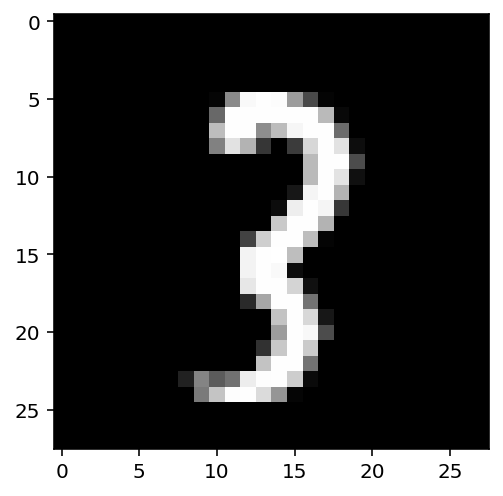

In [28]:
import random
# Here's what an image looks like to us
plt.imshow(images[random.randint(0,16)].numpy().squeeze(), cmap='Greys_r');

In [ ]:
# Now to construct a network
# The typical practice when using pytorch is to rewrite an __init__ and forward pass
# for the default network class but with whatever you need for your actual network.


# For example, we are going to send 28x28 pixels (784) into our network,
# then pass them to smaller and smaller layers
# Typically each layer will be 2^n in size as computers just love that.
class Network(nn.Module):

    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)

    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

model = Network()
model
